In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
from brokenaxes import brokenaxes 
matplotlib.use('pdf')
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits.axes_grid1 import SubplotDivider, Size
from mpl_toolkits.axes_grid1.mpl_axes import Axes
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic(u'matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import *
from scipy.stats import *
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs/sahoo/scripts/")
sys.path.append("/booleanfs2/sahoo/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()


In [2]:
import bone
cfile = "AM_MV.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
#df1


In [3]:
#IC50 ~ TP53 + PTEN + PRKAB1 + KRAS + CDX2 + BRAF + APC + Mutation_burden + Histological_Grade + Clinical_Stage + Acquisition_Site + Primary_Site + Race + Sex + Age
df2 = bone.printOLS("IC50 ~ TP53", df)
df2 = df2.iloc[1: , :]
df3 = bone.printOLS("IC50 ~ PTEN", df)
df3 = df3.iloc[1: , :]
df4 = bone.printOLS("IC50 ~ PRKAB1", df)
df4 = df4.iloc[1: , :]
df5 = bone.printOLS("IC50 ~ KRAS", df)
df5 = df5.iloc[1: , :]
df6 = bone.printOLS("IC50 ~ CDX2", df)
df6 = df6.iloc[1: , :]
df7 = bone.printOLS("IC50 ~ BRAF", df)
df7 = df7.iloc[1: , :]
df8 = bone.printOLS("IC50 ~ APC", df)
df8 = df8.iloc[1: , :]
df9 = bone.printOLS("IC50 ~ Mutation_burden", df)
df9 = df9.iloc[1: , :]
df10 = bone.printOLS("IC50 ~ Histological_Grade", df)
df10 = df10.iloc[1: , :]
df11 = bone.printOLS("IC50 ~ Clinical_Stage", df)
df11 = df11.iloc[1: , :]
df12 = bone.printOLS("IC50 ~ Acquisition_Site", df)
df12 = df12.iloc[1: , :]
df13 = bone.printOLS("IC50 ~ Primary_Site", df)
df13 = df13.iloc[1: , :]
df14 = bone.printOLS("IC50 ~ Race", df)
df14 = df14.iloc[1: , :]
df15 = bone.printOLS("IC50 ~ Sex", df)
df15 = df15.iloc[1: , :]
df16 = bone.printOLS("IC50 ~ Age", df)
df16 = df16.iloc[1: , :]
df17 = bone.printOLS("IC50 ~ PIK3CA", df)
df17 = df17.iloc[1: , :]
df_uni=pd.concat([df4, df6, df2, df17, df3, df5, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16])
#df_uni=pd.concat([df2, df3, df4, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16])

df_uni

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                  0.001912
Date:                Sun, 02 Oct 2022   Prob (F-statistic):              0.966
Time:                        23:39:43   Log-Likelihood:                -70.405
No. Observations:                  23   AIC:                             144.8
Df Residuals:                      21   BIC:                             147.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8571      2.044      4.824      0.0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Intercept	9.37	(5.41 - 13.34)	0.000
Sex	0.62	(-4.29 - 5.54)	0.794
                Name coeff lower 0.95 upper 0.95 pvalues codes
Intercept  Intercept  9.37       5.41      13.34   0.000   ***
Sex              Sex  0.62      -4.29       5.54   0.794      
                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.1006
Date:                Sun, 02 Oct 2022   Prob (F-statistic):              0.754
Time:                        23:39:43   Log-Likelihood:                -70.351
No. Observations:                  23   AIC:                             144.7
Df Residuals:                      21   BIC:                             147.0
Df Model:            

,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
PRKAB1,PRKAB1,288.421787,125.778124,451.065451,0.001367,**
CDX2,CDX2,692.075759,402.282186,981.869332,0.000065,***
TP53,TP53,-0.107143,-5.202347,4.988062,0.965532,
PIK3CA,PIK3CA,3.700000,-3.056167,10.456167,0.267572,
PTEN,PTEN,6.000000,-0.407122,12.407122,0.064973,.
KRAS,KRAS,6.883929,2.858488,10.909369,0.001867,**
BRAF,BRAF,0.868421,-5.304637,7.041479,0.772731,
APC,APC,5.789474,0.189547,11.389400,0.043360,*
Mutation_burden,Mutation_burden,0.002334,-0.001589,0.006257,0.229711,
Histological_Grade,Histological_Grade,-0.183871,-1.712964,1.345222,0.804963,


In [3]:
import bone
cfile = "AM_MV3.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
#df1

#df1 = bone.printOLS("IC50 ~  PTEN + PRKAB1 + KRAS + CDX2 + APC + Mutation_burden", df)
df1 = bone.printOLS("IC50 ~ PRKAB1 + CDX2 + PIK3CA + TP53 + PTEN +  KRAS + BRAF + APC + Mutation_burden + Histological_Grade + Clinical_Stage + Acquisition_Site + Primary_Site + Race + Sex + Age", df)

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     22.90
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           0.000461
Time:                        11:10:27   Log-Likelihood:                 16.497
No. Observations:                  23   AIC:                             1.005
Df Residuals:                       6   BIC:                             20.31
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3404      1

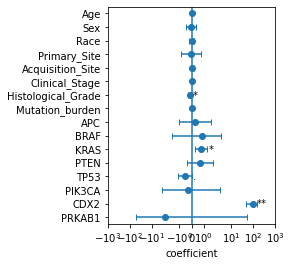

In [6]:
import bone
reload(bone)
df=df1
df = df.drop(['Intercept'])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
plt.xscale('symlog')
ax.set_xlim([-1000, 1000])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)






### import bone
reload(bone)
df=df1
df = df.drop(['Intercept'])
#df["coeff"]= np.log(df["coeff"])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))

ax = plt.subplot2grid((1, 1), (0, 0))
#ax.set_xscale('log')
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')

ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([10^-3, 10^3])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV_all_binary.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


In [19]:
def printO1(fm, df1):
    import statsmodels.formula.api as smf
    lm1 = smf.ols(formula=fm, data=df1).fit()
    print(lm1.summary())
    idx = lm1.params.index
    ci = lm1.conf_int()
    ci_1 = [ ci[0][i] for i in range(len(idx))]
    ci_2 = [ ci[1][i] for i in range(len(idx))]
    c_1 = [ getCode(p) for p in lm1.pvalues]
    df = pd.DataFrame({'Name': idx, 
	'coeff' : lm1.params, 'SE' :  lm1.bse, '25th' :  (lm1.params+ lm1.bse * (-0.67)),'75th' :  (lm1.params+ lm1.bse * (0.67)), 'lower 0.95' : ci_1,
        'upper 0.95' : ci_2, 'pvalues' : lm1.pvalues, 'codes': c_1},
        columns=['Name', 'coeff', 'SE', '25th', '75th' ,'lower 0.95',
	    'upper 0.95', 'pvalues', 'codes'])
    for i in range(len(idx)):
        print('%s\t%.2f\t%.2f\t%.2f\t%.2f\t(%0.2f - %0.2f)\t%0.3f' % \
                (idx[i], lm1.params[i], lm1.bse[i], (lm1.params[i]+ lm1.bse[i] * (-0.67)), (lm1.params[i]+ lm1.bse[i] * (0.67)), ci[0][i], ci[1][i], lm1.pvalues[i]))
    print(df.to_string(formatters={'coeff':'{:,.2f}'.format, 'coeff':'{:,.2f}'.format, 'coeff':'{:,.2f}'.format, 'SE':'{:,.3f}'.format,
        'lower 0.95':'{:,.2f}'.format, 'upper 0.95':'{:,.2f}'.format,
        'pvalues': '{:,.3f}'.format}))
    return df

def getCode(p):
    if p <= 0:
        return '0'
    if p <= 0.001:
        return '***'
    if p <= 0.01:
        return '**'
    if p <= 0.05:
        return '*'
    if p <= 0.1:
        return '.'
    return ''

import bone
cfile = "AM_MV3.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df1 = bone.printO1("IC50 ~ PRKAB1 + Sex + CDX2 + Race + Age + Primary_Site + Acquisition_Site + Mutation_burden + APC + BRAF + KRAS + TP53 + PTEN + PIK3CA + Histological_Grade + Clinical_Stage", df)
df1 = printO1("IC50 ~ PRKAB1 + CDX2 + PIK3CA + TP53 + PTEN +  KRAS + BRAF + APC + Mutation_burden + Histological_Grade + Clinical_Stage + Acquisition_Site + Primary_Site + Race + Sex + Age", df)

#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
df1

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     22.90
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           0.000461
Time:                        09:14:40   Log-Likelihood:                 16.497
No. Observations:                  23   AIC:                             1.005
Df Residuals:                       6   BIC:                             20.31
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3404      1

,Name,coeff,SE,25th,75th,lower 0.95,upper 0.95,pvalues,codes
Intercept,Intercept,-1.340432,1.035580,-2.034271,-0.646593,-3.874406,1.193542,0.243117,
PRKAB1,PRKAB1,-2.584787,21.353560,-16.891672,11.722098,-54.835065,49.665492,0.907606,
CDX2,CDX2,97.546996,21.393847,83.213119,111.880873,45.198138,149.895854,0.003853,**
PIK3CA,PIK3CA,-0.270901,1.325455,-1.158955,0.617154,-3.514172,2.972371,0.844811,
TP53,TP53,-0.544339,0.229988,-0.698431,-0.390247,-1.107100,0.018421,0.055763,.
PTEN,PTEN,0.681872,0.434793,0.390561,0.973184,-0.382029,1.745773,0.167866,
KRAS,KRAS,0.779465,0.212856,0.636851,0.922078,0.258625,1.300304,0.010555,*
BRAF,BRAF,0.822393,1.000563,0.152015,1.492770,-1.625897,3.270682,0.442546,
APC,APC,0.300152,0.534382,-0.057884,0.658187,-1.007433,1.607737,0.594677,
Mutation_burden,Mutation_burden,0.000134,0.000282,-0.000055,0.000323,-0.000555,0.000823,0.650906,


In [20]:
import bone
reload(bone)
df=df1
df = df.drop(['Intercept'])
#df["coeff"]= np.log(df["coeff"])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))

ax = plt.subplot2grid((1, 1), (0, 0))
#ax.set_xscale('log')
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')

ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([10^-3, 10^3])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV_all_3.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [35]:
import bone
cfile = "KRAS_WT.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
#df1
df6 = bone.printOLS("IC50 ~ CDX2", df)
df6 = df6.iloc[1: , :]
df6

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     9.396
Date:                Thu, 23 Jun 2022   Prob (F-statistic):            0.00980
Time:                        11:41:19   Log-Likelihood:                -34.249
No. Observations:                  14   AIC:                             72.50
Df Residuals:                      12   BIC:                             73.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8931      0.926      5.286      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
CDX2,CDX2,628.149295,181.670728,1074.627862,0.009801,**


In [7]:
import bone
reload(bone)
df=df6
#df = df.drop(['Intercept'])
#df["coeff"]= np.log(df["coeff"])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))

ax = plt.subplot2grid((1, 1), (0, 0))
#ax.set_xscale('log')
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')

ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([10^-3, 10^3])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("UV_CDX2_KRAS_WT.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)
plt.show()